In [1]:
import warnings
warnings.filterwarnings("ignore")

import pertpy as pt
import scanpy as sc
import json
import pickle
import anndata as ad

Installed version 0.4.0 of pertpy is outdated. Newest version is 0.5.0!

Global seed set to 0
/home/icb/leonie.pohl/mambaforge/envs/scanpy/lib/python3.9/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
/home/icb/leonie.pohl/mambaforge/envs/scanpy/lib/python3.9/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.


ryp2 is not installed. Install with pip install rpy2 to run tools with R support.

To use sccoda or tasccoda please install ete3 with pip install ete3

In [2]:
adata = sc.read("/lustre/groups/ml01/workspace/daniel.michaela.masterpraktikum23/all_datasets_merged/final_anno_integrated.h5ad")

one run with labels: fibrotic, control, one run with label = model (condition)

# Augur with labels = condition 

In [31]:
adata.obs["cell_type"] = adata.obs["final_annotation"] 
adata.obs["label"] = adata.obs["condition"]

ag_rfc = pt.tl.Augur("random_forest_classifier")
loaded_data = ag_rfc.load(adata)

h_adata, h_results = ag_rfc.predict(loaded_data, subsample_size=20, n_threads=4)


Set smaller span value in the case of a `segmentation fault` error.

Set larger span in case of svddc or other near singularities error.

Output()

Skipping Peribronchial fibroblasts cell type - the number of samples for at least one class type is less than 
subsample size 20.

Skipping SMCs cell type - the number of samples for at least one class type is less than subsample size 20.

Skipping Myofibroblasts cell type - the number of samples for at least one class type is less than subsample size 
20.

Skipping Pericytes cell type - the number of samples for at least one class type is less than subsample size 20.

Skipping Erythroid cells cell type - the number of samples for at least one class type is less than subsample size 
20.

Skipping Platelets cell type - the number of samples for at least one class type is less than subsample size 20.

In [42]:
adata

AnnData object with n_obs × n_vars = 535908 × 2007
    obs: 'author_annotation', 'manual_celltype_annotation', 'batch', 'condition', 'timepoint', 'dataset', 'fibrotic/control', 'coarse_harmonized_anno', 'Phase', 'SAMP_stage', 'SC_prep', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'celltypist_group', 'harmonized_anno', '_scvi_batch', '_scvi_labels', 'leiden_res1', 'majority_anno', 'final_annotation', 'doublet_score', 'predicted_doublet', 'augur_score_dataset-specific', 'cell_type', 'label', 'y_', 'integrated_augur_score_condition_label'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'dataset', 'dataset_col

In [38]:
with open("/home/icb/leonie.pohl/masterpraktikum_fibrosis_atlas/notebooks/Pertpy/Output_augur/integrated_condition_as_labels_all_metrics.json", 'wb') as fp:
    pickle.dump(h_results, fp)

In [39]:
adata.obs["integrated_augur_score_condition_label"] = adata.obs["augur_score"] 

In [41]:
del adata.obs["augur_score"] 

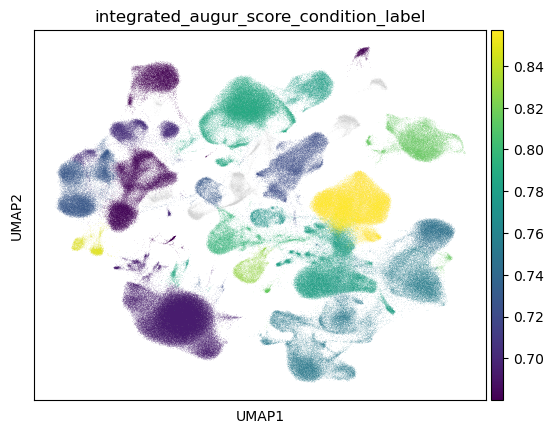

In [47]:
sc.pl.umap(adata, color=[ "integrated_augur_score_condition_label"])

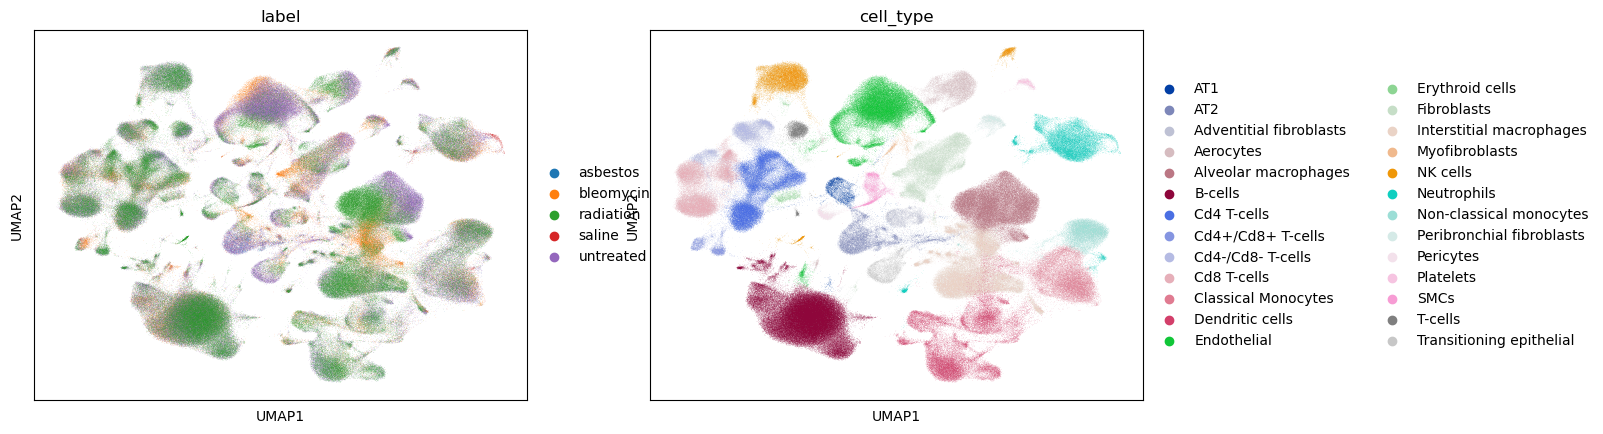

In [36]:
sc.pl.umap(adata, color=[  "label","cell_type"], )

# Augur with labels = fibrotic/control 

In [55]:
adata.obs["cell_type"] = adata.obs["final_annotation"] 
adata.obs["label"] = adata.obs["fibrotic/control"]

ag_rfc = pt.tl.Augur("random_forest_classifier")
loaded_data = ag_rfc.load(adata)

h_adata, h_results = ag_rfc.predict(loaded_data, subsample_size=20, n_threads=4)

Set smaller span value in the case of a `segmentation fault` error.

Set larger span in case of svddc or other near singularities error.

Output()

Installed version 0.4.0 of pertpy is outdated. Newest version is 0.5.0!
Installed version 0.4.0 of pertpy is outdated. Newest version is 0.5.0!
Installed version 0.4.0 of pertpy is outdated. Newest version is 0.5.0!
Installed version 0.4.0 of pertpy is outdated. Newest version is 0.5.0!


Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
/home/icb/leonie.pohl/mambaforge/envs/scanpy/lib/python3.9/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
/home/icb/leonie.pohl/mambaforge/envs/scanpy/lib/python3.9/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
/home/icb/leonie.pohl/mambaforge/envs/scanpy/lib/python3.9/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6

ryp2 is not installed. Install with pip install rpy2 to run tools with R 
support.
ryp2 is not installed. Install with pip install rpy2 to run tools with R 
support.
ryp2 is not installed. Install with pip install rpy2 to run tools with R 
support.
ryp2 is not installed. Install with pip install rpy2 to run tools with R 
support.
To use sccoda or tasccoda please install ete3 with pip install ete3
To use sccoda or tasccoda please install ete3 with pip install ete3
To use sccoda or tasccoda please install ete3 with pip install ete3
To use sccoda or tasccoda please install ete3 with pip install ete3


In [56]:
with open("/home/icb/leonie.pohl/masterpraktikum_fibrosis_atlas/notebooks/Pertpy/Output_augur/integrated_fibrotic_control_as_labels_all_metrics.json", 'wb') as fp:
    pickle.dump(h_results, fp)

In [57]:
adata.obs["integrated_augur_score_fibrotic_control_label"] = adata.obs["augur_score"] 

In [59]:
del adata.obs["augur_score"] 

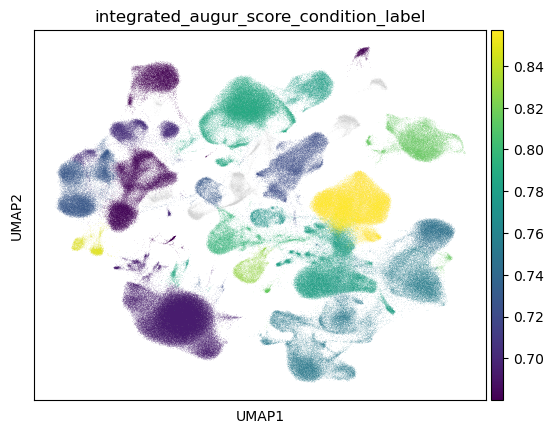

In [58]:
sc.pl.umap(adata, color=[ "integrated_augur_score_condition_label"])

In [61]:
del adata.uns["augurpy_results"]

In [62]:
adata.write("/lustre/groups/ml01/workspace/daniel.michaela.masterpraktikum23/all_datasets_merged/final_anno_integrated.h5ad")